[View in Colaboratory](https://colab.research.google.com/github/lkamat/FashionMnist/blob/master/FashionMnist.ipynb)

## Import the libraries

In [2]:
from __future__ import print_function

import keras
from keras import backend as K
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import RMSprop
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Using TensorFlow backend.


## Load the Fashion Mnist data and do the pre-processing

In [3]:
# Load the train and test data. There are 60,000 images in the train data set and 10,000 in the test dataset

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Print training set shape - note there are 60,000 training data of image size of 28x28, 60,000 train labels)
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training and test datasets
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set


## Visualize the data

5,Sandal


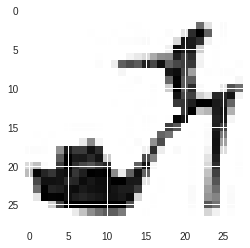

In [4]:
# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

# Image index, you can pick any number between 0 and 59,999
img_index = 9
# y_train contains the lables, ranging from 0 to 9
label_index = y_train[img_index]
# Print the label, for example 2 Pullover
print (str(label_index) + "," + fashion_mnist_labels[label_index])
# # Show one of the images from the training dataset
plt.imshow(x_train[img_index])

6


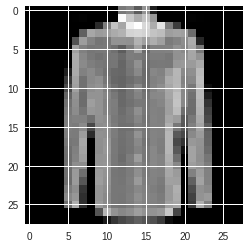

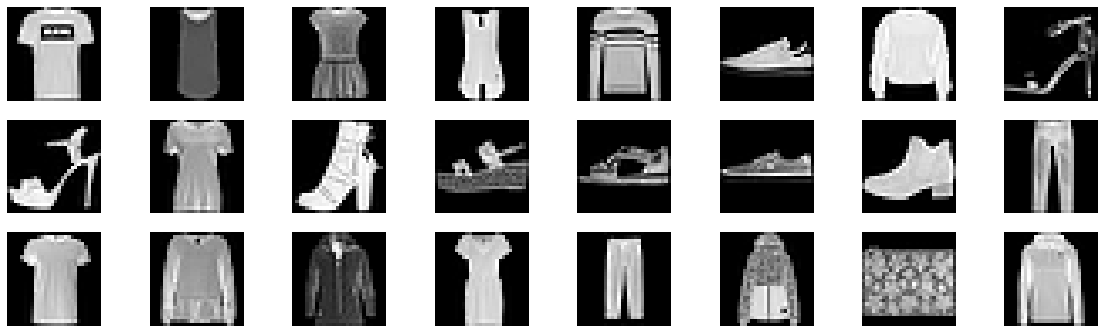

In [5]:
#print some sample data
print (y_train[3000])
fig= plt.figure()
plt.imshow(x_train[3000], cmap='gray')


fig= plt.figure(figsize=(20,10))
for i in range (1,25):
    ax1 = fig.add_subplot(5,8,i)
    plt.xticks([], [])
    plt.yticks([], [])
    ax1.imshow(x_train[i], cmap='gray')
 

## Validation data, Data Normalization

In [6]:
# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Reshape input data from (28, 28) to (28, 28, 1)

img_rows, img_cols = 28, 28
num_classes = 10

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_valid = x_valid.reshape(x_valid.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_valid = x_valid.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_valid /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_valid.shape[0], 'valid samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train shape: (55000, 28, 28, 1)
55000 train samples
5000 valid samples
10000 test samples


## Build the model architecture

In [0]:
#Model Building

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


## Compile the model
We use model.compile() to configure the learning process before training the model. This is where you define the type of loss function, optimizer and the metrics evaluated by the model during training and testing.

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


##Train the model
We will train the model with a batch_size of 64 and 10 epochs.



In [0]:
# Add the modelcheckpoint to save the best weights used during validation data
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)

In [10]:
## train the model with batch_size of 128, epochs of 20
model.fit(x_train,
         y_train,
         batch_size=128,
         epochs=20,
         verbose=1,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 10s 190us/step - loss: 0.5496 - acc: 0.8068 - val_loss: 0.3293 - val_acc: 0.8804

Epoch 00001: val_loss improved from inf to 0.32932, saving model to model.weights.best.hdf5
Epoch 2/20
55000/55000 [==============================] - 9s 164us/step - loss: 0.3572 - acc: 0.8718 - val_loss: 0.2744 - val_acc: 0.9032

Epoch 00002: val_loss improved from 0.32932 to 0.27442, saving model to model.weights.best.hdf5
Epoch 3/20
15104/55000 [=======>......................] - ETA: 6s - loss: 0.3135 - acc: 0.8852

55000/55000 [==============================] - 9s 162us/step - loss: 0.3091 - acc: 0.8876 - val_loss: 0.2553 - val_acc: 0.9054

Epoch 00003: val_loss improved from 0.27442 to 0.25529, saving model to model.weights.best.hdf5
Epoch 4/20
55000/55000 [==============================] - 9s 162us/step - loss: 0.2735 - acc: 0.9001 - val_loss: 0.2317 - val_acc: 0.9132

Epoch 00004: val_loss improved from 0.25529 to 0.23169, saving model to model.weights.best.hdf5
Epoch 5/20
30592/55000 [===============>..............] - ETA: 3s - loss: 0.2498 - acc: 0.9094

55000/55000 [==============================] - 9s 162us/step - loss: 0.2500 - acc: 0.9089 - val_loss: 0.2179 - val_acc: 0.9224

Epoch 00005: val_loss improved from 0.23169 to 0.21788, saving model to model.weights.best.hdf5
Epoch 6/20
55000/55000 [==============================] - 9s 161us/step - loss: 0.2300 - acc: 0.9139 - val_loss: 0.2207 - val_acc: 0.9200

Epoch 00006: val_loss did not improve from 0.21788
Epoch 7/20
36224/55000 [==================>...........] - ETA: 2s - loss: 0.2137 - acc: 0.9205

55000/55000 [==============================] - 9s 161us/step - loss: 0.2139 - acc: 0.9208 - val_loss: 0.2055 - val_acc: 0.9278

Epoch 00007: val_loss improved from 0.21788 to 0.20545, saving model to model.weights.best.hdf5
Epoch 8/20
55000/55000 [==============================] - 9s 161us/step - loss: 0.1985 - acc: 0.9272 - val_loss: 0.1988 - val_acc: 0.9282

Epoch 00008: val_loss improved from 0.20545 to 0.19884, saving model to model.weights.best.hdf5
Epoch 9/20
34176/55000 [=================>............] - ETA: 3s - loss: 0.1808 - acc: 0.9328

55000/55000 [==============================] - 9s 162us/step - loss: 0.1816 - acc: 0.9325 - val_loss: 0.1934 - val_acc: 0.9302

Epoch 00009: val_loss improved from 0.19884 to 0.19343, saving model to model.weights.best.hdf5
Epoch 10/20
55000/55000 [==============================] - 9s 161us/step - loss: 0.1712 - acc: 0.9362 - val_loss: 0.1966 - val_acc: 0.9274

Epoch 00010: val_loss did not improve from 0.19343
Epoch 11/20
36608/55000 [==================>...........] - ETA: 2s - loss: 0.1626 - acc: 0.9387

55000/55000 [==============================] - 9s 162us/step - loss: 0.1610 - acc: 0.9394 - val_loss: 0.1984 - val_acc: 0.9330

Epoch 00011: val_loss did not improve from 0.19343
Epoch 12/20
55000/55000 [==============================] - 9s 162us/step - loss: 0.1466 - acc: 0.9445 - val_loss: 0.1960 - val_acc: 0.9336

Epoch 00012: val_loss did not improve from 0.19343
Epoch 13/20
46080/55000 [========================>.....] - ETA: 1s - loss: 0.1436 - acc: 0.9465

55000/55000 [==============================] - 9s 161us/step - loss: 0.1421 - acc: 0.9467 - val_loss: 0.2033 - val_acc: 0.9284

Epoch 00013: val_loss did not improve from 0.19343
Epoch 14/20
55000/55000 [==============================] - 9s 161us/step - loss: 0.1308 - acc: 0.9493 - val_loss: 0.2028 - val_acc: 0.9348

Epoch 00014: val_loss did not improve from 0.19343
Epoch 15/20
47744/55000 [=========================>....] - ETA: 1s - loss: 0.1252 - acc: 0.9522

55000/55000 [==============================] - 9s 161us/step - loss: 0.1259 - acc: 0.9523 - val_loss: 0.2026 - val_acc: 0.9332

Epoch 00015: val_loss did not improve from 0.19343
Epoch 16/20
55000/55000 [==============================] - 9s 162us/step - loss: 0.1169 - acc: 0.9561 - val_loss: 0.2021 - val_acc: 0.9344

Epoch 00016: val_loss did not improve from 0.19343
Epoch 17/20
47744/55000 [=========================>....] - ETA: 1s - loss: 0.1123 - acc: 0.9578

55000/55000 [==============================] - 9s 162us/step - loss: 0.1126 - acc: 0.9579 - val_loss: 0.2200 - val_acc: 0.9322

Epoch 00017: val_loss did not improve from 0.19343
Epoch 18/20
55000/55000 [==============================] - 9s 162us/step - loss: 0.1094 - acc: 0.9590 - val_loss: 0.2193 - val_acc: 0.9336

Epoch 00018: val_loss did not improve from 0.19343
Epoch 19/20
47744/55000 [=========================>....] - ETA: 1s - loss: 0.1034 - acc: 0.9602

55000/55000 [==============================] - 9s 161us/step - loss: 0.1039 - acc: 0.9601 - val_loss: 0.2147 - val_acc: 0.9322

Epoch 00019: val_loss did not improve from 0.19343
Epoch 20/20
55000/55000 [==============================] - 9s 161us/step - loss: 0.0960 - acc: 0.9632 - val_loss: 0.2140 - val_acc: 0.9334

Epoch 00020: val_loss did not improve from 0.19343


#Load model with best validation accuracy

In [0]:
# Load the weights with the best validation accuracy
model.load_weights('model.weights.best.hdf5')

#Test accuracy

In [12]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)



# Print test loss
print('Test loss:', score[0])

# Print test accuracy
print('\n', 'Test accuracy:', score[1])

Test loss: 0.21502940386533737

 Test accuracy: 0.9247


# Visualize prediction
Visualize the prediction using the trained model.  First we get the predictions with the model from the test data. Then we print out 15 images from the test data set, and set the titles with the prediction (and the groud truth label). If the prediction matches the true label, the title will be green; otherwise it's displayed in red.

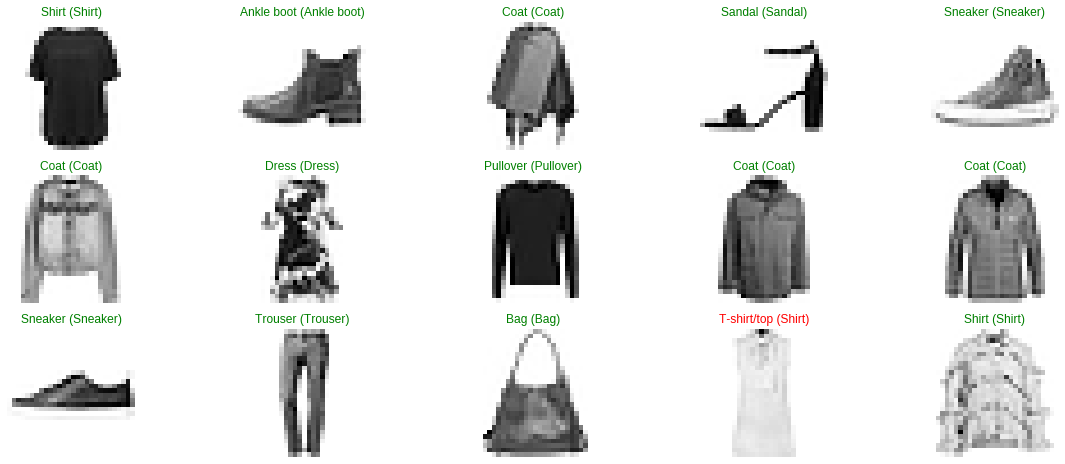

In [14]:
y_hat = model.predict(x_test)
import numpy as np

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))